In [66]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
stocks = "HAFNI.OL ORK.OL ELISA.HE NOKIA.HE GOGL GM"

In [145]:
def PrintPF(name, pf):
    print(name)
    print("----------------")
    print(f"Return: {pf.Ret.item():.4%}")
    print(f"Volat.: {pf.Vol.item():.4%}")
    print("   Composition")
    for k, v in pf.Comp.item().items():
        print(f"   {k}: {v:.2%}")
    print("")

## Mean-Variance optimisation under no constraints

In [149]:
from optimisation import Mean_Variance_No_Constraints_Robust

exp_ret = 0.35 #we fix an expected return of 35%
pf = Mean_Variance_No_Constraints_Robust(stocks, exp_ret, period="3y", verbose=False)
PrintPF("Optimal no constraint portfolio", pf)

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  6 of 6 completed

Optimal no constraint portfolio
----------------
Return: 30.3034%
Volat.: 41.8269%
   Composition
   HAFNI.OL: -95.04%
   ORK.OL: 21.62%
   ELISA.HE: -22.09%
   NOKIA.HE: 60.42%
   GOGL: 0.45%
   GM: 134.63%



## Mean-Variance optimisation without shortselling

In [150]:
from optimisation import Mean_Variance_No_Shortselling

exp_ret = 0.20 #we fix an expected return of 20%
pf_nss = Mean_Variance_No_Shortselling(stocks, exp_ret, period="3y", verbose=False)
PrintPF("Optimal no shortselling portfolio", pf_nss)

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  6 of 6 completed

Optimal no shortselling portfolio
----------------
Return: 18.3789%
Volat.: 41.4200%
   Composition
   HAFNI.OL: 0.00%
   ORK.OL: 0.00%
   ELISA.HE: 0.00%
   NOKIA.HE: 97.33%
   GOGL: 0.00%
   GM: 2.67%



## Efficiency frontier under no constraints

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  6 of 6 completed


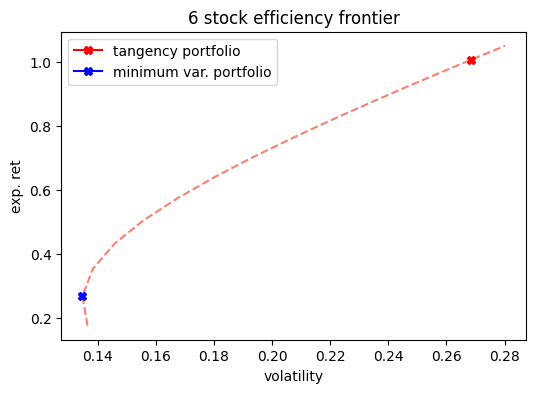

In [78]:
from optimisation import Efficiency_Frontier_No_Constraints

EF = Efficiency_Frontier_No_Constraints(stocks, 0.1, 1.5, prec=0.1, period="1y", verbose=False)
tang_pf = EF.iloc[EF["Ret/Vol"].argmax()]
minvar_pf = EF.iloc[EF["Vol"].argmin()]

plt.figure(figsize=(6,4))
plt.title("6 stock efficiency frontier")
plt.plot(EF.Vol,EF.Ret,linestyle="--",color="salmon")
plt.plot(tang_pf.Vol,tang_pf.Ret,marker="X",color="red",label="tangency portfolio")
plt.plot(minvar_pf.Vol,minvar_pf.Ret,marker="X",color="blue",label="minimum var. portfolio")
plt.ylabel("exp. ret")
plt.xlabel("volatility")
plt.legend()
plt.show()

### Composition of tangency portfolio

In [85]:
PrintPF("tangency portfolio",tang_pf)

tangency portfolio
----------------
Return: 100.7193%
Volat.: 26.8559%
   Composition
   HAFNI.OL: -2.18%
   ORK.OL: 8.92%
   ELISA.HE: -11.96%
   NOKIA.HE: -30.00%
   GOGL: 46.30%
   GM: 88.92%



### Composition of minimum variance portfolio

In [86]:
PrintPF("minimum variance portfolio",minvar_pf)

minimum variance portfolio
----------------
Return: 26.8756%
Volat.: 13.4705%
   Composition
   HAFNI.OL: 35.09%
   ORK.OL: 11.67%
   ELISA.HE: 8.59%
   NOKIA.HE: 5.44%
   GOGL: 12.20%
   GM: 27.02%

